# Setup

In [114]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')

### Load packages

In [8]:
##Import packages
import os
import anndata as ad
import scimap as sm
import importlib

import scanpy as sp
import pandas as pd
import numpy as np
import napari as napari
import math
import seaborn as sns
import itertools
import umap as um

from scipy import stats
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
from matplotlib.colors import Normalize

import hetmel as hm

In [22]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)

<module 'hetmel' from '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py'>

### Set up files, directories, variables

Set and go to project directory 

In [7]:
project_dir = "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/"
case_number = "Case3-7"
print(case_number)
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
savedir= "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/"

Case3-7


Variables 

In [117]:
phenotype = pd.read_csv('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/20250408_phenotyping_workflow_allcombinations.csv')
image_path="/Volumes/FallahiLab/Maize-Data/Leica-Thunder/Kimberly_Nguyen/20250225_HetMel_Cases1-4/Case2-7/background/Case2-7_final.ome.tif"
feature_table_path = "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case2-7/Case4-2_feature-extraction.csv"

### Read in data

In [116]:
adata = ad.read_h5ad('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case2-7/Case2-7_v2.h5ad')

### Write data

In [256]:
#write adata to a file
case_number='Case1-38'
Case1_tumor_adata_subset.write(project_dir + case_number + '/' + case_number +'_tumor_adata_subset_cluster.h5ad')

Read in feature extraction csv and convert to anndata frame 

In [109]:

adata = sm.pp.mcmicro_to_scimap(feature_table_path)

Loading Case4-2_feature-extraction.csv


Set marker subset variables 

In [59]:
#Marker subsets
AP1s = ['cFOS', 'FRA1','FRA2','cJUN','JUNB','JUND']
Diff_state_markers = ['MITF','SOX10','PRAME','AXL','SOX9','NGFR']

Create layers to save log raw data and zscore of the log raw data

In [110]:
adata


AnnData object with n_obs × n_vars = 89031 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid'
    uns: 'all_markers'
    layers: 'log'

In [111]:

adata.layers["log1p_raw"] = np.log1p(adata.raw.X) #log layer
adata.layers["zscore"] = stats.zscore(adata.layers["log1p_raw"], axis = 0) #z score log layer
adata

AnnData object with n_obs × n_vars = 89031 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid'
    uns: 'all_markers'
    layers: 'log', 'log1p_raw', 'zscore'

## Check pixel distribution 

In [ ]:
hm.distPlot(adata, layer='log1p_raw',figsize=(7,10),ncols=3, fontsize=20,scale_x1=0, scale_x2=8)

NameError: name 'adata' is not defined

## Gating

In [29]:
from tifffile import imread
img_data = imread(image_path)
print(img_data.shape) 

(17, 5496, 9528)


Identify gates to phenotype discrete cell types 

In [118]:
sm.pl.napariGater (image_path, adata, )#channel_names=['CD45','FAP','MITF','SOX9','SOX10','NGFR','PRAME','AXL' ])

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_5836/1802044421.py:1: UserWarning:

NOTE: napariGater() is currently in beta testing. If you encounter any issues, please report them at: https://github.com/labsyspharm/scimap/issues



Initializing...
Loading image data...
Calculating contrast settings...


Saved contrast settings for Case2-7_feature-extraction with 17 channels
Initialization completed in 253.30 seconds
Opening napari viewer...


Napari viewer initialized in 259.47 seconds


Alternatively, read in csv file containing gates for desired markers

In [71]:
marker_gates = pd.read_csv('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case3-7/Case3-7_markergates.csv',
    header = [0], index_col =[0])

adata.uns['gates'] = marker_gates

OR copy gates from a previous adata file

In [112]:
bdata = ad.read_h5ad('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case4-2/Case4-2_v3.h5ad')
adata.uns['gates'] = bdata.uns['gates']

In [124]:
adata.uns['gates']

Case4-2_feature-extraction
markers                            
AXL                        3.700000
CD4                        2.969593
CD45                       3.200000
FAP                        3.700000
FRA1                       4.290770
FRA2                       3.002591
Hoechst                    6.418848
JUNB                       4.075545
JUND                       2.870907
Ki67                       2.702158
MITF                       2.800000
NGFR                       5.000000
PRAME                      3.000417
SOX10                      3.500000
SOX9                       3.900000
cFOS                       3.924615
cJUN                       3.447487

## Phenotyping

Rescale data in adata.X according to gates.
Values greater than gate scales 0.5-1. Values lower than gate scaled to 0-0.5.

In [5]:
sm.pp.rescale(adata, gate=adata.uns['gates'])


NameError: name 'sm' is not defined

Run phenotyping function, generating new adata.obs layer for "phenotype" based on the previously defined phenotyping workflow

In [ ]:
phenotype.style.format(na_rep='')
adata= sm.tl.phenotype_cells (adata, phenotype=phenotype, label="phenotype") 


Phenotyping Tumor cell
Phenotyping Fibroblast
Phenotyping Immune Cell
-- Subsetting Tumor cell
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL-
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL-
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9- AXL-
Phenotyping MITF- SO

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF- SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR- SOX9- AXL+
Phenotyping MITF- SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF- SO

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

Phenotyping MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL+
Phenotyping MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL+
Phenotyping MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Consolidating the phenotypes across all groups


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [ ]:
adata.obs['phenotype'].value_counts()

NameError: name 'adata' is not defined

Heatmap to check marker expression.
Does tumor cell expression look like any other cell type? If not, relabel "Tumor cell" as "Unknown"

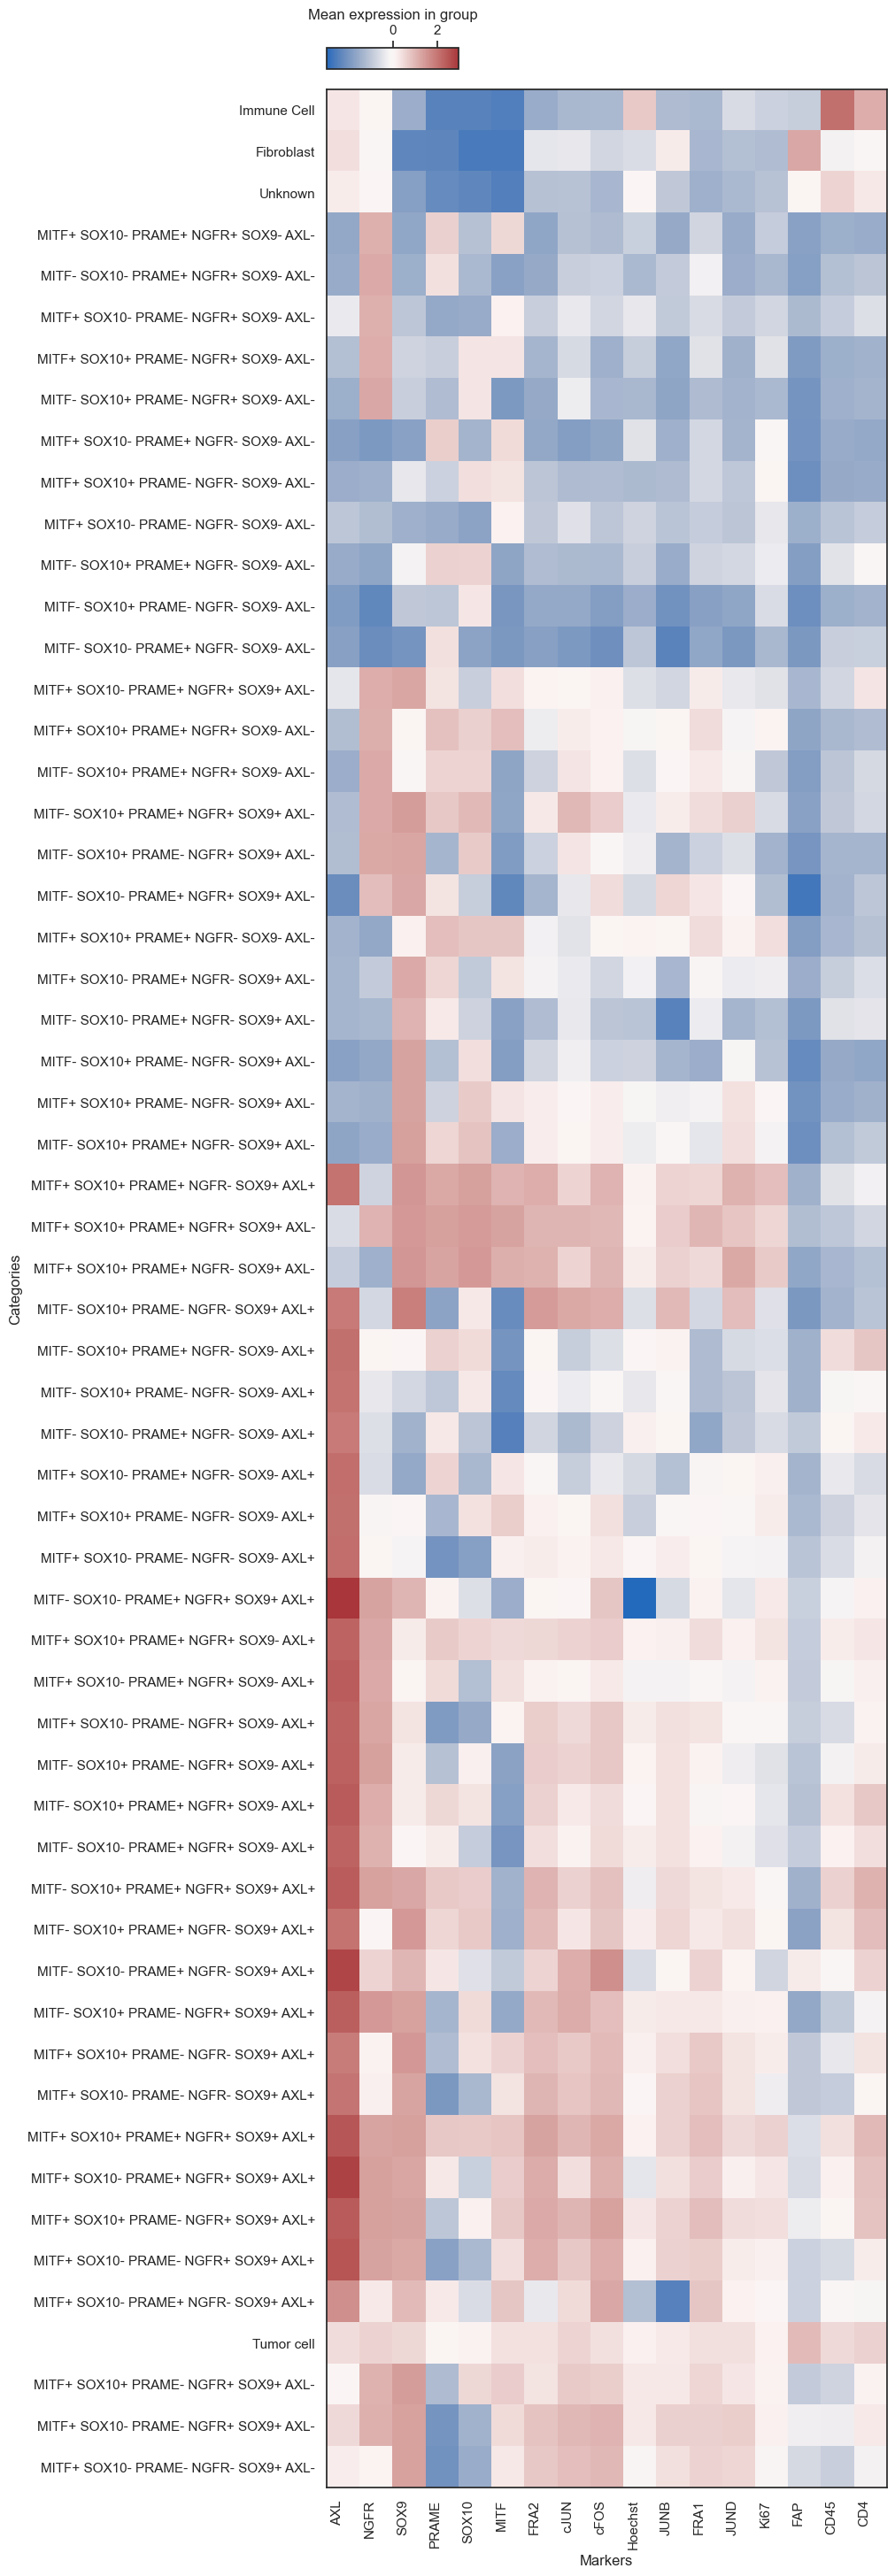

In [ ]:
hm.heatmap(adata,groupBy='phenotype',layer='zscore')

In [ ]:
adata = hm.replace_phenotype(adata, 'Tumor cell', 'Unknown')

In [ ]:
case_number

'Case4-2'

Save adata

In [ ]:
#write adata to a file
adata.write(project_dir + '/' + case_number + '/' + case_number + '_v4.h5ad')

## Subset adata to focus analysis on tumor cells within tumor ROI

In [143]:
adata

AnnData object with n_obs × n_vars = 89031 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype', 'phenotype_category', 'ROI'
    uns: 'all_markers', 'gates'
    layers: 'log', 'log1p_raw', 'zscore'

In [132]:
# Apply the categorize_phenotype function to create a new column in adata.obs
# Categorizes each cell as Tumor, TME, or Other based on the phenotype
adata.obs['phenotype_category'] = adata.obs['phenotype'].apply(hm.categorize_phenotype)
# Display the updated adata.obs
adata.obs.head()

X_centroid  Y_centroid  Area  MajorAxisLength  \
Case4-2_feature-extraction_1  141.333333    3.208333  48.0         8.777094   
Case4-2_feature-extraction_2  161.465116    3.813953  43.0         8.287052   
Case4-2_feature-extraction_3  168.525000    2.150000  40.0         9.086156   
Case4-2_feature-extraction_4  184.186667    3.346667  75.0        11.229225   
Case4-2_feature-extraction_5  223.767442    2.232558  43.0         9.104435   

                              MinorAxisLength  Eccentricity  Solidity  \
Case4-2_feature-extraction_1         7.105660      0.587025  0.960000   
Case4-2_feature-extraction_2         7.025392      0.530388  0.895833   
Case4-2_feature-extraction_3         5.888274      0.761599  0.869565   
Case4-2_feature-extraction_4         8.632351      0.639562  0.961538   
Case4-2_feature-extraction_5         6.178131      0.734522  0.977273   

                                Extent  Orientation  CellID  \
Case4-2_feature-extraction_1  0.857143     0.258275       1   
Case4-2_feature-extraction_2  0.671875    -0.670622       2   
Case4-2_feature-extraction_3  0.833333     1.428118       3   
Case4-2_feature-extraction_4  0.852273    -1.349134       4   
Case4-2_feature-extraction_5  0.895833     1.325385       5   

                                                 imageid  \
Case4-2_feature-extraction_1  Case4-2_feature-extraction   
Case4-2_feature-extraction_2  Case4-2_feature-extraction   
Case4-2_feature-extraction_3  Case4-2_feature-extraction   
Case4-2_feature-extraction_4  Case4-2_feature-extraction   
Case4-2_feature-extraction_5  Case4-2_feature-extraction   

                                                         phenotype  \
Case4-2_feature-extraction_1  MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-   
Case4-2_feature-extraction_2                               Unknown   
Case4-2_feature-extraction_3                               Unknown   
Case4-2_feature-extraction_4  MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-   
Case4-2_feature-extraction_5                               Unknown   

                             phenotype_category  
Case4-2_feature-extraction_1              Tumor  
Case4-2_feature-extraction_2              Other  
Case4-2_feature-extraction_3              Other  
Case4-2_feature-extraction_4              Tumor  
Case4-2_feature-extraction_5              Other

Add ROIs using napari. Make sure to name Shapes layer "Tumor" to enable tumor subsetting later

In [55]:
###add ROIS
%gui qt
sm.pl.addROI_image(image_path, adata)
adata.obs['ROI'].value_counts()


        Opening Napari;
        Add shape layers (on left) to draw ROI's. 
        Rename the shape layer to give a name to your ROI
        Multiple shape layers are supported
        ROI's should not overlap
        Close Napari to save ROI's.
        
Identifying cells within selected ROI's
ROIs saved under adata.obs['ROI']


ROI
Tumor    18736
Other    11259
Name: count, dtype: int64

In [151]:
#Function to replace values in the 'ROI' column in case you forgot to name the shape layer
#adata.obs['ROI'] = adata.obs['ROI'].replace("Shapes", "Tumor")
adata.obs['ROI'].value_counts()

ROI
Other          36354
Tumor_right    30016
Tumor_left     22661
Name: count, dtype: int64

OR copy ROIs from a previous adata file

In [150]:
#bdata = ad.read_h5ad('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/Case4-2/Case4-2_v2.h5ad')
#write adata to a file
adata.obs['ROI'] = bdata.obs['ROI']

Create new tumor.adata object with only tumor cells

In [152]:
#subset adata for cells with Tumor phenotype and Tumor ROI
tumor_adata = adata[(adata.obs['phenotype_category'] == 'Tumor') & (adata.obs['ROI'].str.contains('Tumor', na=False, case=False))]
tumor_adata.obs['ROI'].value_counts()
tumor_adata.write(project_dir + '/' + case_number +'/' + str(case_number) + "_tumor_adata_v4.h5ad")

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



Inspect tumor adata

In [153]:
tumor_adata.obs.head()


X_centroid   Y_centroid  Area  \
Case4-2_feature-extraction_11112  1395.562500  1166.562500  48.0   
Case4-2_feature-extraction_11239  1668.589744  1176.000000  39.0   
Case4-2_feature-extraction_11685  1621.268817  1221.150538  93.0   
Case4-2_feature-extraction_11705  1450.428571  1221.551020  49.0   
Case4-2_feature-extraction_11845  1776.666667  1232.125000  48.0   

                                  MajorAxisLength  MinorAxisLength  \
Case4-2_feature-extraction_11112         7.831560         7.823575   
Case4-2_feature-extraction_11239         7.358930         6.700506   
Case4-2_feature-extraction_11685        12.474572         9.509792   
Case4-2_feature-extraction_11705         8.123987         7.751234   
Case4-2_feature-extraction_11845         8.394400         7.314798   

                                  Eccentricity  Solidity    Extent  \
Case4-2_feature-extraction_11112      0.045145  0.923077  0.750000   
Case4-2_feature-extraction_11239      0.413449  0.951220  0.795918   
Case4-2_feature-extraction_11685      0.647184  0.939394  0.768595   
Case4-2_feature-extraction_11705      0.299434  0.924528  0.765625   
Case4-2_feature-extraction_11845      0.490590  0.905660  0.750000   

                                  Orientation  CellID  \
Case4-2_feature-extraction_11112    -0.785398   11112   
Case4-2_feature-extraction_11239     0.000000   11239   
Case4-2_feature-extraction_11685     0.841457   11685   
Case4-2_feature-extraction_11705    -0.950547   11705   
Case4-2_feature-extraction_11845    -0.878475   11845   

                                                     imageid  \
Case4-2_feature-extraction_11112  Case4-2_feature-extraction   
Case4-2_feature-extraction_11239  Case4-2_feature-extraction   
Case4-2_feature-extraction_11685  Case4-2_feature-extraction   
Case4-2_feature-extraction_11705  Case4-2_feature-extraction   
Case4-2_feature-extraction_11845  Case4-2_feature-extraction   

                                                             phenotype  \
Case4-2_feature-extraction_11112  MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+   
Case4-2_feature-extraction_11239  MITF- SOX10- PRAME+ NGFR- SOX9- AXL-   
Case4-2_feature-extraction_11685  MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-   
Case4-2_feature-extraction_11705  MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-   
Case4-2_feature-extraction_11845  MITF- SOX10+ PRAME- NGFR+ SOX9- AXL+   

                                 phenotype_category         ROI  
Case4-2_feature-extraction_11112              Tumor  Tumor_left  
Case4-2_feature-extraction_11239              Tumor  Tumor_left  
Case4-2_feature-extraction_11685              Tumor  Tumor_left  
Case4-2_feature-extraction_11705              Tumor  Tumor_left  
Case4-2_feature-extraction_11845              Tumor  Tumor_left

In [62]:
tumor_adata.obs['phenotype'].value_counts()

phenotype
MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-    3458
MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-    1872
MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-     709
MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-     646
MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-     620
MITF+ SOX10- PRAME- NGFR- SOX9- AXL-     480
MITF- SOX10+ PRAME- NGFR- SOX9- AXL-     309
MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-     208
MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-     161
MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-     133
MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-     111
MITF- SOX10- PRAME+ NGFR- SOX9- AXL-      63
MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-      59
MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-      45
MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-      31
MITF- SOX10- PRAME+ NGFR- SOX9- AXL+      29
MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-      27
MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL+      24
MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-      19
MITF- SOX10- PRAME+ NGFR+ SOX9- AXL+      17
MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-      16
MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-      16


## High-res heatmap of diff states vs AP-1 

Check cell states in tumor cells in order of prevalence, thresholding to exclude super rare states/likely artefacts

In [88]:
phenotype_subset = hm.threshold_phenotype_by_prevalence(tumor_adata, threshold=0.01,verbose=True)

                                      count
phenotype                                  
MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-  65156
MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-  38061
MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-  17024
MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-  10482
MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-   9804
MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-   9341
MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-   8009
MITF- SOX10+ PRAME- NGFR- SOX9- AXL-   7980
MITF+ SOX10- PRAME- NGFR- SOX9- AXL-   6877
MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-   4249
MITF- SOX10- PRAME+ NGFR- SOX9- AXL-   3396
MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-   2603
MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-   2558
MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-   2521
total count:197483


### Heatmap of phenotyped cell states vs diff state marker levels

Read in data if necessary

In [596]:
tumor_adata = ad.read_h5ad(project_dir + case_number +'/'+ 'ROI_tumor_adata_v2.h5ad')

Reloading hetmel module to implement any changes to function in hetmel.py

In [109]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)


<module 'hetmel' from '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py'>

### Hierarchical clustering of differentiation state

In [9]:
Case3_tumor_adata

AnnData object with n_obs × n_vars = 197483 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype', 'phenotype_category', 'ROI'
    uns: 'all_markers', 'gates'
    layers: 'log', 'log1p_raw', 'zscore'

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1609: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



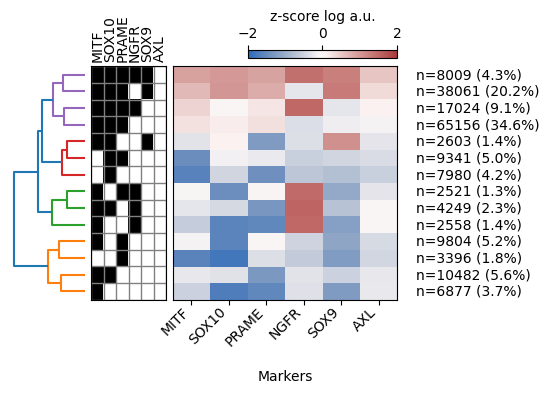

In [107]:

subsetMarkers = ['MITF','SOX10','PRAME','NGFR','SOX9','AXL']
link333= hm.heatmapnew(Case3_tumor_adata_subset, groupBy='phenotype', layer = 'tumor_zscore' , 
            standardScale=None, subsetMarkers=subsetMarkers, 
            figsize=(5,4), showPrevalence=True, clusterColumns=False, clusterRows=True, scale_title ='z-score log a.u.',
            dend_threshold=3, dend_axis=False,
            row_dendrogram=True, phenotype_matrix=True,
            x_tick_rotation=45,
            clustering_method='complete',  #single, complete, average, ward, weighted, centroid
            phenotype_labels=['MITF','SOX10','PRAME','NGFR','SOX9','AXL'],
            return_row_linkage=True,
            vmin=-2, vmax=2,
            #saveDir=savedir,
            #fileName='Case4-2_diffstate_heatmap.pdf'
            
                     )

In [70]:
import os

In [197]:
link3

{'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+': 1,
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+': 1,
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-': 2,
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-': 2,
 'MITF- SOX10+ PRAME- NGFR- SOX9- AXL-': 2,
 'MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-': 3,
 'MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-': 3,
 'MITF- SOX10- PRAME+ NGFR- SOX9- AXL-': 3,
 'MITF+ SOX10- PRAME- NGFR- SOX9- AXL-': 3}

### Comparing hierarchical clustering across several tumors

Read in all 4 tumor_adata

In [113]:
Case1_tumor_adata = ad.read_h5ad(project_dir +"/Case1-38/Case1-38_tumor_adata_v2.h5ad")
Case2_tumor_adata = ad.read_h5ad(project_dir +"/Case2-7/Case2-7_tumor_adata_v2.h5ad")
Case3_tumor_adata = ad.read_h5ad(project_dir +"/Case3-7/Case3-7_tumor_adata_v2.h5ad")
Case4_tumor_adata = ad.read_h5ad(project_dir +"/Case4-2/Case4-2_tumor_adata_v4.h5ad")

Z-score raw intensity based on tumor adata subset, instead of literally all the cells. Save new z-score as tumor_zscore in adata.obs

Subset tumor adata further to exclude phenotypes that are below a certain threshold of prevalence

In [26]:
Case1_tumor_adata_subset = hm.threshold_phenotype_by_prevalence(Case1_tumor_adata, threshold=0.01, verbose=False, return_adata=True)
Case2_tumor_adata_subset = hm.threshold_phenotype_by_prevalence(Case2_tumor_adata, threshold=0.01, verbose=False, return_adata=True)
Case3_tumor_adata_subset = hm.threshold_phenotype_by_prevalence(Case3_tumor_adata, threshold=0.01, verbose=False, return_adata=True)
Case4_tumor_adata_subset = hm.threshold_phenotype_by_prevalence(Case4_tumor_adata, threshold=0.01, verbose=False, return_adata=True)

In [27]:
tumor_adata_list = [Case1_tumor_adata_subset, Case2_tumor_adata_subset, Case3_tumor_adata_subset, Case4_tumor_adata_subset]
# Compute z-scores and assign them to a new layer
for i in tumor_adata_list:
    i.layers['tumor_zscore'] = stats.zscore(i.layers["log1p_raw"], axis=0
)

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_5836/1915331716.py:4: ImplicitModificationWarning:

Setting element `.layers['tumor_zscore']` of view, initializing view as actual.

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_5836/1915331716.py:4: ImplicitModificationWarning:

Setting element `.layers['tumor_zscore']` of view, initializing view as actual.

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_5836/1915331716.py:4: ImplicitModificationWarning:

Setting element `.layers['tumor_zscore']` of view, initializing view as actual.

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_5836/1915331716.py:4: ImplicitModificationWarning:

Setting element `.layers['tumor_zscore']` of view, initializing view as actual.



Case 1


/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1613: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



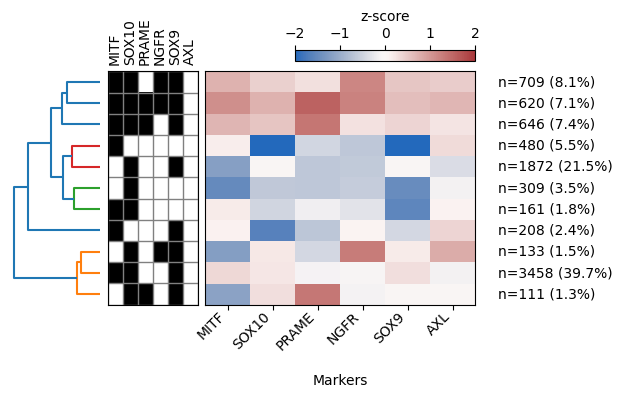

Case 2


/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1613: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



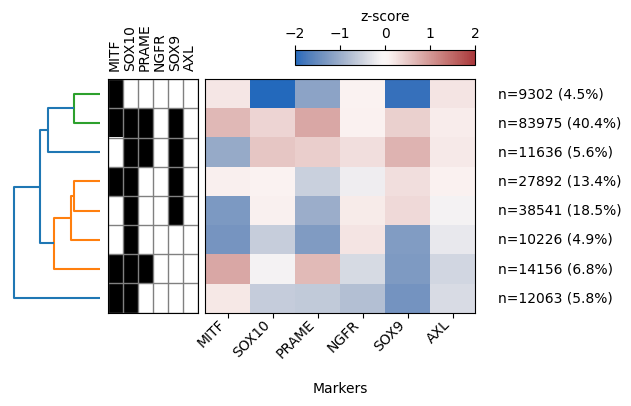

Case 3


/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1613: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



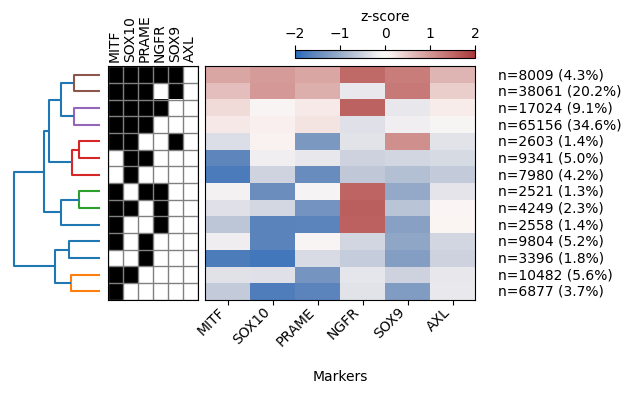

Case 4


/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1613: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



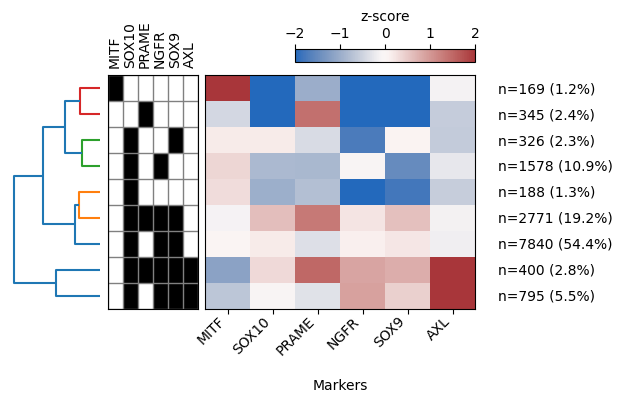

In [372]:
tumor_adata_list = [Case1_tumor_adata_subset, Case2_tumor_adata_subset, Case3_tumor_adata_subset, Case4_tumor_adata_subset]
dend_threshold_list=[2,3, 1.9, 2.5]
subsetMarkers = ['MITF','SOX10','PRAME','NGFR','SOX9','AXL']

for i in range(4):
    print(f"Case {i+1}")
    hm.heatmapnew(
        tumor_adata_list[i],
        groupBy='phenotype',
        layer='tumor_zscore',
        standardScale=None,
        subsetMarkers=subsetMarkers,
        figsize=(6, 4),
        showPrevalence=True,
        clusterColumns=False,
        clusterRows=True,
        scale_title='z-score',
        dend_threshold=dend_threshold_list[i],
        clustering_method='complete',
        phenotype_matrix=True,
        row_dendrogram=True,
        x_tick_rotation=45,
        dend_axis=False,
        phenotype_labels=['MITF','SOX10','PRAME','NGFR','SOX9','AXL'],
        vmin=-2,
        vmax=2
    )

[[1 0 0 0 0 0]
 [0 0 3 0 0 0]
 [0 2 0 0 5 0]
 [0 2 0 4 0 0]
 [0 2 0 0 0 0]
 [0 2 3 4 5 0]
 [0 2 0 4 5 0]
 [0 2 3 4 5 6]
 [0 2 0 4 5 6]]
['MITF+ SOX10- PRAME- NGFR- SOX9- AXL-'
 'MITF- SOX10- PRAME+ NGFR- SOX9- AXL-'
 'MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-'
 'MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-'
 'MITF- SOX10+ PRAME- NGFR- SOX9- AXL-'
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-'
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-'
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+'
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+']


/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1614: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



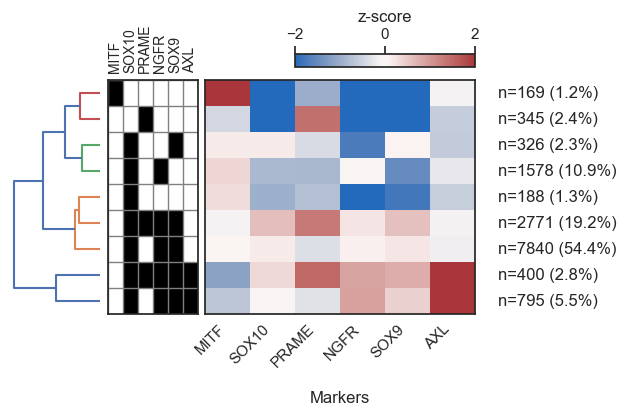

In [32]:
subsetMarkers = ['MITF','SOX10','PRAME','NGFR','SOX9','AXL']


hm.heatmapnew(
    Case4_tumor_adata_subset,
    groupBy='phenotype',
    layer='tumor_zscore',
    standardScale=None,
    subsetMarkers=subsetMarkers,
    figsize=(6, 4),
    showPrevalence=True,
    clusterColumns=False,
    clusterRows=True,
    scale_title='z-score',
    dend_threshold=3,
    clustering_method='complete',
    phenotype_matrix=True,
    row_dendrogram=True,
    x_tick_rotation=45,
    dend_axis=False,
    phenotype_labels=['MITF','SOX10','PRAME','NGFR','SOX9','AXL'],
    vmin=-2,
    vmax=2,
    verbose=True,
)

In [33]:
Case3_matrix = np.array([
    [1, 2, 3, 4, 5, 0],
    [1, 2, 3, 0, 5, 0],
    [1, 2, 3, 4, 0, 0],
    [1, 2, 3, 0, 0, 0],
    [1, 2, 0, 0, 5, 0],
    [0, 2, 3, 0, 0, 0],
    [0, 2, 0, 0, 0, 0],
    [1, 0, 3, 4, 0, 0],
    [1, 2, 0, 4, 0, 0],
    [1, 0, 0, 4, 0, 0],
    [1, 0, 3, 0, 0, 0],
    [0, 0, 3, 0, 0, 0],
    [1, 2, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0]
])

Case1_matrix = np.array([
    [1, 2, 0, 4, 5, 0],
    [1, 2, 3, 4, 5, 0],
    [1, 2, 3, 0, 5, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 2, 0, 0, 5, 0],
    [0, 2, 0, 0, 0, 0],
    [1, 2, 0, 0, 0, 0],
    [1, 0, 0, 0, 5, 0],
    [0, 2, 0, 4, 5, 0],
    [1, 2, 0, 0, 5, 0],
    [0, 2, 3, 0, 5, 0]
])

Case2_matrix = np.array([
    [1, 0, 0, 0, 0, 0],
    [1, 2, 3, 0, 5, 0],
    [0, 2, 3, 0, 5, 0],
    [1, 2, 0, 0, 5, 0],
    [0, 2, 0, 0, 5, 0],
    [0, 2, 0, 0, 0, 0],
    [1, 2, 3, 0, 0, 0],
    [1, 2, 0, 0, 0, 0]
])

Case4_matrix = np.array([
    [1, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0],
    [0, 2, 0, 0, 5, 0],
    [0, 2, 0, 4, 0, 0],
    [0, 2, 0, 0, 0, 0],
    [0, 2, 3, 4, 5, 0],
    [0, 2, 0, 4, 5, 0],
    [0, 2, 3, 4, 5, 6],
    [0, 2, 0, 4, 5, 6]
])

In [88]:
# Join all arrays and remove duplicate rows

all_matrices = np.vstack([
    Case1_matrix,
    Case2_matrix,
    Case3_matrix,
    Case4_matrix
])

# Remove duplicate rows
# np.unique with axis=0 returns unique rows
unique_matrix = np.unique(all_matrices, axis=0)

print(unique_matrix.shape)
unique_matrix_binary = (unique_matrix > 0).astype(int)

(23, 6)


In [40]:
print(all_matrices.shape)

(42, 6)


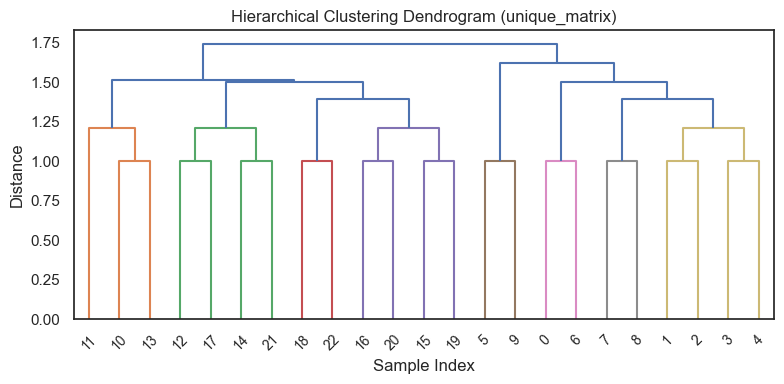

In [105]:

# Run hierarchical clustering on unique_matrix
#Z = linkage(unique_matrix, method='ward', metric='euclidean')
Z = linkage(unique_matrix_binary, method='average', metric='euclidean')
# Plot dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (unique_matrix)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

In [106]:
from scipy.cluster.hierarchy import leaves_list

# Get the order of rows according to the dendrogram linkage
row_order = leaves_list(Z)

# Reorder unique_matrix according to the dendrogram
unique_matrix_ordered = unique_matrix_binary[row_order]

print(unique_matrix_ordered)

[[1 0 0 0 1 0]
 [1 0 0 0 0 0]
 [1 0 1 0 0 0]
 [1 0 0 1 0 0]
 [1 1 0 1 0 0]
 [1 0 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 0 1 1 0]
 [1 1 1 1 1 0]
 [1 1 0 0 1 0]
 [1 1 1 0 1 0]
 [1 1 0 0 0 0]
 [1 1 1 0 0 0]
 [0 1 0 1 1 1]
 [0 1 1 1 1 1]
 [0 0 1 0 0 0]
 [0 1 1 0 0 0]
 [0 1 1 0 1 0]
 [0 1 1 1 1 0]
 [0 1 0 0 0 0]
 [0 1 0 0 1 0]
 [0 1 0 1 0 0]
 [0 1 0 1 1 0]]


In [107]:
# Define marker names for each column
marker_names = ['MITF', 'SOX10', 'PRAME', 'NGFR', 'SOX9', 'AXL']

# Function to convert a row to phenotype string
def row_to_phenotype(row, marker_names):
    phenotype = []
    for val, marker in zip(row, marker_names):
        if val == 0:
            phenotype.append(f"{marker}-")
        else:
            phenotype.append(f"{marker}+")
    return " ".join(phenotype)

# Convert all rows in unique_matrix_ordered to phenotype strings
phenotype_array = [row_to_phenotype(row, marker_names) for row in unique_matrix_ordered]

# Display the phenotype array
for i, pheno in enumerate(phenotype_array):
    print(f"Row {i+1}: {pheno}")

Row 1: MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-
Row 2: MITF+ SOX10- PRAME- NGFR- SOX9- AXL-
Row 3: MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-
Row 4: MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-
Row 5: MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-
Row 6: MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-
Row 7: MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-
Row 8: MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-
Row 9: MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Row 10: MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-
Row 11: MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-
Row 12: MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-
Row 13: MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-
Row 14: MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+
Row 15: MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+
Row 16: MITF- SOX10- PRAME+ NGFR- SOX9- AXL-
Row 17: MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-
Row 18: MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-
Row 19: MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-
Row 20: MITF- SOX10+ PRAME- NGFR- SOX9- AXL-
Row 21: MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-
Row 22: MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-
Row 23: MITF- SOX10

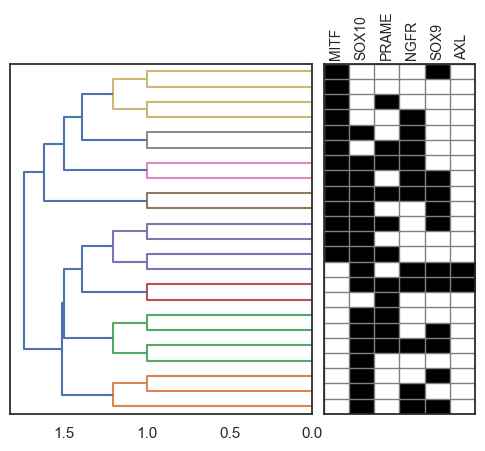

In [ ]:
dend_threshold=1.3
figsize = (6, 10)
fig = plt.figure(figsize=figsize)
spec = plt.GridSpec(nrows=2, ncols=2, 
                    width_ratios=[1,0.5,],
                    
                    wspace=0.05,
                    figure=fig)

ax_row_dendro = fig.add_subplot(spec[1, 0])
row_dendro = dendrogram(Z, orientation='left', ax=ax_row_dendro, color_threshold=dend_threshold)
unique_matrix_ordered = unique_matrix[row_order]

colors=['white','black', 'black','black','black','black','black']
bounds=[0, 1 , 2, 3,4,5,6,7]
from matplotlib import colors as mplt
cmap = mplt.ListedColormap(colors)
norm = mplt.BoundaryNorm(bounds, cmap.N)

ax_colored_grid = fig.add_subplot(spec[1, 1])

ax_colored_grid.axis('on')
    
ax_colored_grid.imshow(unique_matrix_ordered, cmap=cmap, norm= norm, aspect='auto', extent=[0, unique_matrix_ordered.shape[1], 0, unique_matrix_ordered.shape[0]])

# remove tick labels
ax_colored_grid.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False) 

ax_colored_grid.set_xticks(np.arange(0, unique_matrix_ordered.shape[1] + 1, 1), minor=False)
ax_colored_grid.set_yticks(np.arange(0, unique_matrix_ordered.shape[0] + 1, 1), minor=False)
ax_colored_grid.grid(which="major", color="grey", linestyle='-', linewidth=1)
ax_colored_grid.tick_params(which="major", size=0, labelbottom=False, labelleft=False)
    

# column labels
columnlabels = marker_names
for i, label in enumerate(columnlabels):    
    ax_colored_grid.text(i + 0.5, unique_matrix_ordered.shape[0] + 0.3, label, ha='center', va='bottom', rotation=90, fontsize=10)

In [47]:
unique_matrix_ordered

array([[0, 2, 0, 4, 5, 6],
       [0, 2, 3, 4, 5, 6],
       [0, 2, 0, 4, 5, 0],
       [1, 2, 0, 4, 5, 0],
       [0, 2, 3, 4, 5, 0],
       [1, 2, 3, 4, 5, 0],
       [0, 2, 3, 0, 5, 0],
       [1, 2, 3, 0, 5, 0],
       [1, 0, 0, 0, 5, 0],
       [0, 2, 0, 0, 5, 0],
       [1, 2, 0, 0, 5, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [1, 2, 0, 0, 0, 0],
       [0, 0, 3, 0, 0, 0],
       [1, 0, 3, 0, 0, 0],
       [0, 2, 3, 0, 0, 0],
       [1, 2, 3, 0, 0, 0],
       [1, 0, 3, 4, 0, 0],
       [1, 2, 3, 4, 0, 0],
       [1, 0, 0, 4, 0, 0],
       [0, 2, 0, 4, 0, 0],
       [1, 2, 0, 4, 0, 0]])

In [165]:
# List of tumor adata objects
tumor_adata_list = [Case1_tumor_adata, Case2_tumor_adata, Case3_tumor_adata, Case4_tumor_adata]


# List to store the subsetted adata objects
tumor_adata_subset_list = []

# Apply thresholding to each tumor adata
for i, tumor_adata in enumerate(tumor_adata_list, start=1):
    print(f"Processing Case {i}...")
    tumor_adata_subset = hm.threshold_phenotype_by_prevalence(
        tumor_adata, 
        threshold=0.01, 
        verbose=False, 
        return_adata=True
    )
    tumor_adata_subset_list.append(tumor_adata_subset)

Processing Case 1...
Processing Case 2...
Processing Case 3...
Processing Case 4...


In [374]:
tumor_adata_subset_list[2]

View of AnnData object with n_obs × n_vars = 188061 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype', 'phenotype_category', 'ROI'
    uns: 'all_markers', 'gates'
    layers: 'log', 'log1p_raw', 'zscore', 'tumor_zscore'

### Extracting phenotype clusters below a defined threshold

Threshold the whole tumor_adata to represent phenotypes with prevalence above a threshold. Threshold should match the heatmap/dendogram that the phenotype:cluster dictionary came from. Use heatmapnew function to return Phenotype:cluster dictionary as output 

Assign clusters to each cell in adata using the phenotype:cluster map (dictionary)

In [199]:
Case1_tumor_adata_subset = hm.assign_clusters_from_dendogram(Case1_tumor_adata_subset, phenotype_cluster_dict=link333, label='cluster_p3')

Phenotype: MITF+ SOX10- PRAME- NGFR- SOX9- AXL-, Cluster: 1
Phenotype: MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-, Cluster: 1
Phenotype: MITF- SOX10- PRAME+ NGFR- SOX9- AXL-, Cluster: 1
Phenotype: MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-, Cluster: 1
Phenotype: MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-, Cluster: 2
Phenotype: MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-, Cluster: 2
Phenotype: MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-, Cluster: 2
Phenotype: MITF- SOX10+ PRAME- NGFR- SOX9- AXL-, Cluster: 3
Phenotype: MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-, Cluster: 3
Phenotype: MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-, Cluster: 3
Phenotype: MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-, Cluster: 4
Phenotype: MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-, Cluster: 4
Phenotype: MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-, Cluster: 4
Phenotype: MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-, Cluster: 4
cluster_p3
3.0    3767
4.0    1266
1.0     641
Name: count, dtype: int64


/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:66: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



### Heatmap of differentiation state clusters vs AP-1 expression

Do the different differentiation state clusters have differences in AP-1 state?

In [84]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)

<module 'hetmel' from '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py'>

## Case 1

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1610: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



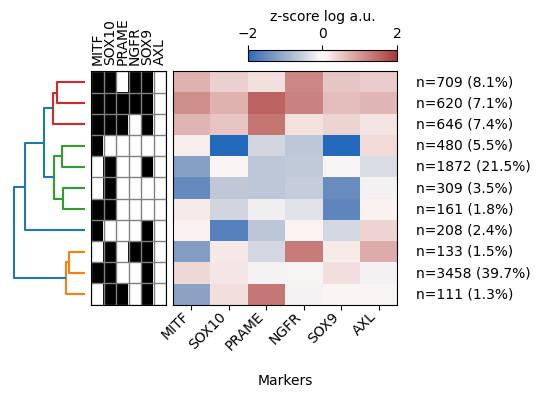

In [207]:

subsetMarkers = ['MITF','SOX10','PRAME','NGFR','SOX9','AXL']
Case1_linkage = hm.heatmapnew(Case1_tumor_adata_subset, groupBy='phenotype', layer = 'tumor_zscore' , 
            standardScale=None, subsetMarkers=subsetMarkers, 
            figsize=(5,4), showPrevalence=True, clusterColumns=False, clusterRows=True, scale_title ='z-score log a.u.',
            dend_threshold=3, dend_axis=False,
            row_dendrogram=True, phenotype_matrix=True,
            x_tick_rotation=45,
            clustering_method='complete',  #single, complete, average, ward, weighted, centroid
            phenotype_labels=['MITF','SOX10','PRAME','NGFR','SOX9','AXL'],
            return_row_linkage=True,
            vmin=-2, vmax=2,
            #saveDir=savedir,
            #fileName='Case4-2_diffstate_heatmap.pdf'
            
                     )

In [210]:
Case1_tumor_adata_subset = hm.assign_clusters_from_dendogram(Case1_tumor_adata_subset, phenotype_cluster_dict=Case1_linkage, label='cluster_p3')

Phenotype: MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-, Cluster: 1
Phenotype: MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-, Cluster: 1
Phenotype: MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-, Cluster: 1
Phenotype: MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-, Cluster: 4
Phenotype: MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-, Cluster: 2
Phenotype: MITF- SOX10+ PRAME- NGFR- SOX9- AXL-, Cluster: 2
Phenotype: MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-, Cluster: 2
Phenotype: MITF+ SOX10- PRAME- NGFR- SOX9- AXL-, Cluster: 2
Phenotype: MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-, Cluster: 3
Phenotype: MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-, Cluster: 3
Phenotype: MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-, Cluster: 3
cluster_p3
1    3702
2    2822
3    1975
4     208
Name: count, dtype: int64


To order heatmap rows, type in the order of phenotype:clusters ^ from bottom to top

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1610: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



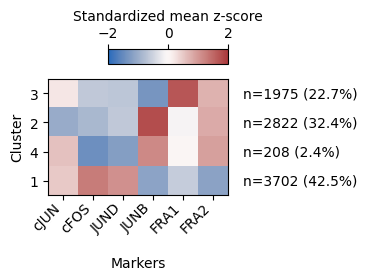

In [212]:
subsetMarkers = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND']
hm.heatmapnew(Case1_tumor_adata_subset, groupBy='cluster_p3', layer = 'tumor_zscore' , 
            standardScale='column', subsetMarkers=subsetMarkers, 
            figsize=(4,2), showPrevalence=True, 
            x_tick_rotation=45,
            clusterColumns=True, clusterRows=False, 
            orderRow= [3,2,4,1], scale_title ='Standardized mean z-score', y_lab='Cluster',
            phenotype_labels=['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND'],
            vmin=-2, vmax=2,
            #saveDir=savedir,
            #fileName='Case4-2_ap1state_heatmap.pdf'
             )

## Case 2

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1613: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



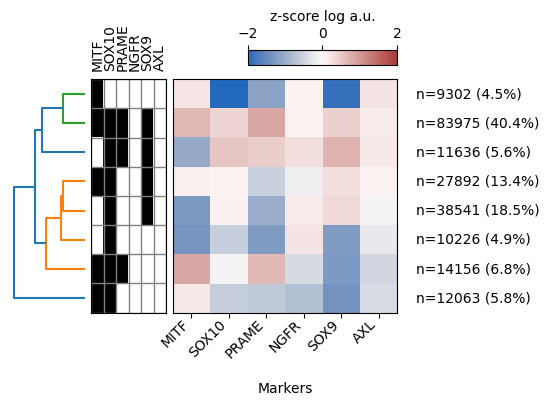

In [257]:

subsetMarkers = ['MITF','SOX10','PRAME','NGFR','SOX9','AXL']
Case2_linkage = hm.heatmapnew(Case2_tumor_adata_subset, groupBy='phenotype', layer = 'tumor_zscore' , 
            standardScale=None, subsetMarkers=subsetMarkers, 
            figsize=(5,4), showPrevalence=True, clusterColumns=False, clusterRows=True, scale_title ='z-score log a.u.',
            dend_threshold=3, dend_axis=False,
            row_dendrogram=True, phenotype_matrix=True,
            x_tick_rotation=45,
            clustering_method='complete',  #single, complete, average, ward, weighted, centroid
            phenotype_labels=['MITF','SOX10','PRAME','NGFR','SOX9','AXL'],
            return_row_linkage=True,
            vmin=-2, vmax=2,
            #saveDir=savedir,
            #fileName='Case4-2_diffstate_heatmap.pdf'
            
                     )



In [258]:
Case2_tumor_adata_subset = hm.assign_clusters_from_dendogram(Case2_tumor_adata_subset, phenotype_cluster_dict=Case2_linkage, label='cluster_p3')

Phenotype: MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-, Cluster: 4
Phenotype: MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-, Cluster: 1
Phenotype: MITF- SOX10+ PRAME- NGFR- SOX9- AXL-, Cluster: 1
Phenotype: MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-, Cluster: 1
Phenotype: MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-, Cluster: 1
Phenotype: MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-, Cluster: 3
Phenotype: MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-, Cluster: 2
Phenotype: MITF+ SOX10- PRAME- NGFR- SOX9- AXL-, Cluster: 2
cluster_p3
2    93277
1    90815
4    12063
3    11636
Name: count, dtype: int64


/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1613: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



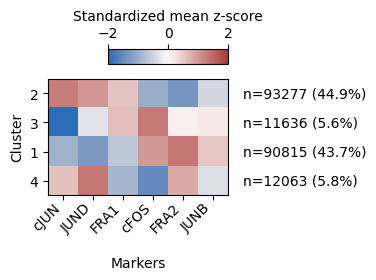

In [259]:
subsetMarkers = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND']
hm.heatmapnew(Case2_tumor_adata_subset, groupBy='cluster_p3', layer = 'tumor_zscore' , 
            standardScale='column', subsetMarkers=subsetMarkers, 
            figsize=(4,2), showPrevalence=True, 
            x_tick_rotation=45,
            clusterColumns=True, clusterRows=False, 
            orderRow= [2,3,1,4], scale_title ='Standardized mean z-score', y_lab='Cluster',
            phenotype_labels=['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND'],
            vmin=-2, vmax=2,
            #saveDir=savedir,
            #fileName='Case4-2_ap1state_heatmap.pdf'
             )

## Case 3

In [12]:
subsetMarkers = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND']
hm.heatmapnew(Case3_tumor_adata_subset, groupBy='cluster', layer = 'tumor_zscore' , 
            standardScale='column', subsetMarkers=subsetMarkers, 
            figsize=(4,2), showPrevalence=True, 
            x_tick_rotation=45,
            clusterColumns=True, clusterRows=False, 
            orderRow= [7,6,5,3,4,2,1], scale_title ='Standardized mean z-score', y_lab='Cluster',
            phenotype_labels=['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND'],
            vmin=-2, vmax=2,
            verbose=True,
            #saveDir=savedir,
            #fileName='Case4-2_ap1state_heatmap.pdf'
             )


KeyError: 'cluster'

## Case 4

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1613: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



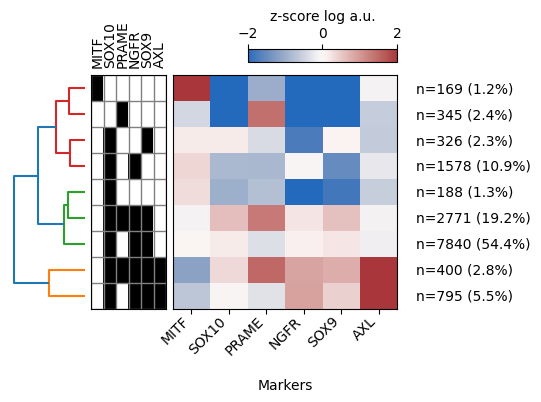

In [260]:

subsetMarkers = ['MITF','SOX10','PRAME','NGFR','SOX9','AXL']
Case4_linkage = hm.heatmapnew(Case4_tumor_adata_subset, groupBy='phenotype', layer = 'tumor_zscore' , 
            standardScale=None, subsetMarkers=subsetMarkers, 
            figsize=(5,4), showPrevalence=True, clusterColumns=False, clusterRows=True, scale_title ='z-score log a.u.',
            dend_threshold=5, dend_axis=False,
            row_dendrogram=True, phenotype_matrix=True,
            x_tick_rotation=45,
            clustering_method='complete',  #single, complete, average, ward, weighted, centroid
            phenotype_labels=['MITF','SOX10','PRAME','NGFR','SOX9','AXL'],
            return_row_linkage=True,
            vmin=-2, vmax=2,
            #saveDir=savedir,
            #fileName='Case4-2_diffstate_heatmap.pdf'
            
                     )

Assign cluster to cells in a new layer. Rememeber to include p distance parameter in cluster title

In [382]:
Case3_tumor_adata_subset = hm.assign_clusters_from_dendogram(Case3_tumor_adata_subset, phenotype_cluster_dict=Case3_linkage, label='cluster_p2')

Phenotype: MITF+ SOX10- PRAME- NGFR- SOX9- AXL-, Cluster: 1
Phenotype: MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-, Cluster: 1
Phenotype: MITF- SOX10- PRAME+ NGFR- SOX9- AXL-, Cluster: 2
Phenotype: MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-, Cluster: 2
Phenotype: MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-, Cluster: 4
Phenotype: MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-, Cluster: 3
Phenotype: MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-, Cluster: 3
Phenotype: MITF- SOX10+ PRAME- NGFR- SOX9- AXL-, Cluster: 5
Phenotype: MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-, Cluster: 5
Phenotype: MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-, Cluster: 5
Phenotype: MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-, Cluster: 6
Phenotype: MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-, Cluster: 6
Phenotype: MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-, Cluster: 7
Phenotype: MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-, Cluster: 7
cluster_p2
6    82180
7    46070
5    19924
1    17359
2    13200
3     6770
4     2558
Name: count, dtype: int64


/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1613: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



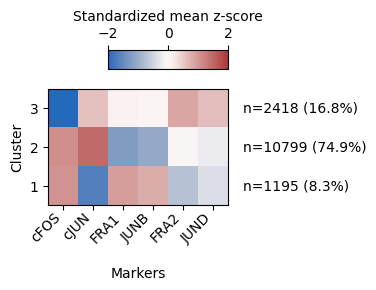

In [262]:
subsetMarkers = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND']
hm.heatmapnew(Case4_tumor_adata_subset, groupBy='cluster_p5', layer = 'tumor_zscore' , 
            standardScale='column', subsetMarkers=subsetMarkers, 
            figsize=(4,2), showPrevalence=True, 
            x_tick_rotation=45,
            clusterColumns=True, clusterRows=False, 
            orderRow= [3,2,1], scale_title ='Standardized mean z-score', y_lab='Cluster',
            phenotype_labels=['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND'],
            vmin=-2, vmax=2,
            #saveDir=savedir,
            #fileName='Case4-2_ap1state_heatmap.pdf'
             )

In [ ]:
case_number= "Case4-2"
Case4_tumor_adata_subset.write(project_dir + '/' + case_number + '/' + case_number + '_tumor_adata_subset.h5ad')

## Correlation plots

In [ ]:
sm.plmarkerCorrelation(Case3_tumor_adata_subset, layer='z_score', subsetMarkers=None, 
                       orderRow=None, orderColumn=None, 
                       clusterRows=True, clusterColumns=True, 
                       cmap='vlag', figsize=None, overlayValues=False, 
                       fontSize=10, fontColor='black', 
                       #fileName='markerCorrelation.pdf', saveDir=None,
                       )

In [346]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)


<module 'hetmel' from '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py'>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore


In [341]:
savedir = "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/"

In [349]:
tumor_subsets = [
    (Case1_tumor_adata_subset, "Case1-38"),
    (Case2_tumor_adata_subset, "Case2-7"),
    (Case3_tumor_adata_subset, "Case3-7"),
    (Case4_tumor_adata_subset, "Case4-2")
]

In [352]:
for tumor_adata, case_number in tumor_subsets:
    hm.plot_scatter(
        tumor_adata,
        x_marker='cJUN',
        y_marker='cFOS',
        color_marker='MITF',
        layer='log1p_raw',
        sample_fraction=0.2,
        figsize=(6, 5),
        x_divisor=None,
        y_divisor=None,
        saveDir=savedir,
        title_prefix=case_number,
        zscore_points=True,
        zscore_threshold=None,
    )

Saved scatterplot to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/Case1-38_cJUNvscFOSvsMITF.png
Saved scatterplot to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/Case2-7_cJUNvscFOSvsMITF.png
Saved scatterplot to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/Case3-7_cJUNvscFOSvsMITF.png
Saved scatterplot to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/Case4-2_cJUNvscFOSvsMITF.png


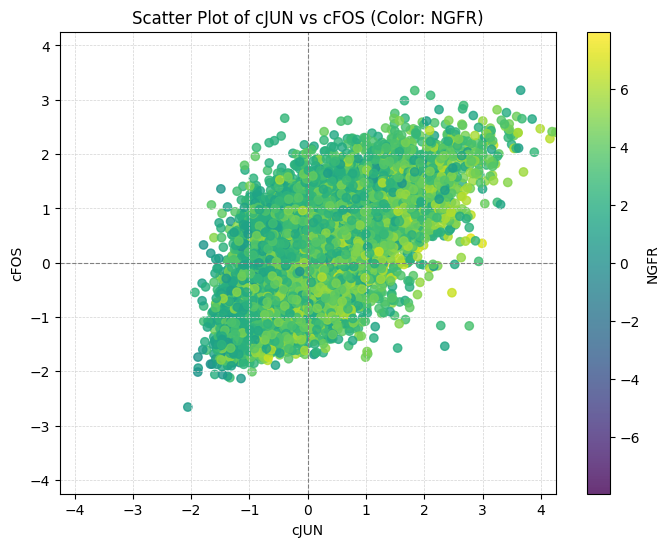

In [301]:
hm.plot_scatter(
    Case3_tumor_adata_subset, 
    x_marker='cJUN', 
    y_marker='cFOS', 
    color_marker='NGFR', 
    layer='log1p_raw', 
    sample_fraction=0.05, 
    x_divisor=None, 
    y_divisor=None, 
    zscore_points=True, 
    zscore_threshold=5
)

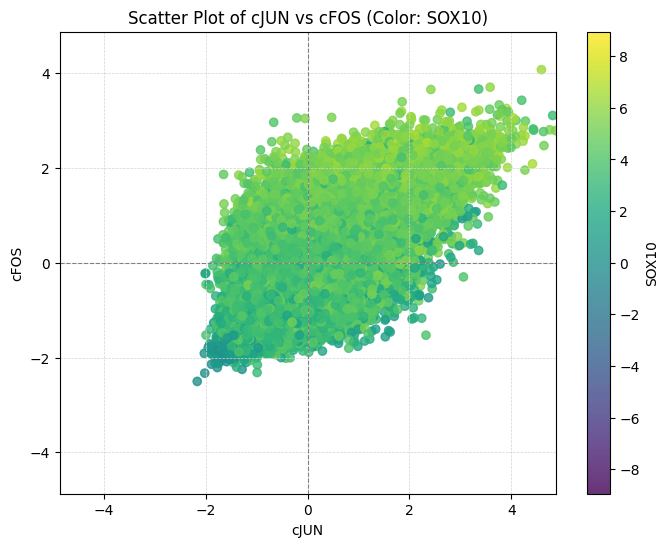

In [313]:
hm.plot_scatter(
    Case3_tumor_adata_subset, 
    x_marker='cJUN', 
    y_marker='cFOS', 
    color_marker='SOX10', 
    layer='log1p_raw', 
    sample_fraction=0.3, 
    x_divisor=None, 
    y_divisor=None, 
    zscore_points=True, 
    zscore_threshold=5
)

## UMAP

In [428]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)

<module 'hetmel' from '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py'>

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1614: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



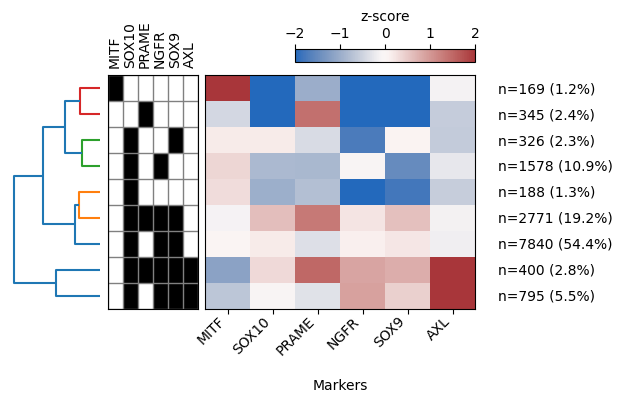

In [498]:
Case4_linkage = hm.heatmapnew(
        Case4_tumor_adata_subset,
        groupBy='phenotype',
        layer='tumor_zscore',
        standardScale=None,
        subsetMarkers=subsetMarkers,
        figsize=(6, 4),
        showPrevalence=True,
        clusterColumns=False,
        clusterRows=True,
        scale_title='z-score',
        dend_threshold=2.3,
        clustering_method='complete',
        phenotype_matrix=True,
        row_dendrogram=True,
        x_tick_rotation=45,
        dend_axis=False,
        phenotype_labels=['MITF','SOX10','PRAME','NGFR','SOX9','AXL'],
        vmin=-2,
        vmax=2,
        return_row_linkage=True,
    )

In [499]:
Case4_tumor_adata_subset = hm.assign_clusters_from_dendogram(Case4_tumor_adata_subset, phenotype_cluster_dict=Case4_linkage, label='cluster_p23')

Phenotype: MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+, Cluster: 1
Phenotype: MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+, Cluster: 2
Phenotype: MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-, Cluster: 4
Phenotype: MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-, Cluster: 3
Phenotype: MITF- SOX10+ PRAME- NGFR- SOX9- AXL-, Cluster: 3
Phenotype: MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-, Cluster: 5
Phenotype: MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-, Cluster: 5
Phenotype: MITF- SOX10- PRAME+ NGFR- SOX9- AXL-, Cluster: 6
Phenotype: MITF+ SOX10- PRAME- NGFR- SOX9- AXL-, Cluster: 6
cluster_p23
4    7840
3    2959
5    1904
1     795
6     514
2     400
Name: count, dtype: int64


In [429]:
Case3_linkage

{'MITF+ SOX10- PRAME- NGFR- SOX9- AXL-': 1,
 'MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-': 1,
 'MITF- SOX10- PRAME+ NGFR- SOX9- AXL-': 1,
 'MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-': 1,
 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-': 2,
 'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-': 2,
 'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-': 2,
 'MITF- SOX10+ PRAME- NGFR- SOX9- AXL-': 3,
 'MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-': 3,
 'MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-': 3,
 'MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-': 4,
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-': 4,
 'MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-': 4,
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-': 4}

In [430]:
Case3_tumor_adata_subset

AnnData object with n_obs × n_vars = 188061 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype', 'phenotype_category', 'ROI', 'cluster_p2', 'cluster_p3'
    uns: 'all_markers', 'gates'
    layers: 'log', 'log1p_raw', 'zscore', 'tumor_zscore'

In [535]:
Case4_umap_diff = hm.run_umap(
    Case4_tumor_adata_subset, 
    use_layer='tumor_zscore', 
    n_neighbors=5, 
    n_components=2, 
    metric='euclidean', 
    min_dist=0.9 ,
    random_state=0, 
    label='umap_diff', 
    subset_columns=Diff_state_markers,
    balance_key="cluster_p23"  # Example subset of columns
)

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1990: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:2024: ImplicitModificationWarning:

Setting element `.obsm['umap_diff']` of view, initializing view as actual.



In [563]:
Case4_tumor_adata_subset.obs['cluster_p5']

Case4-2_feature-extraction_11112    1
Case4-2_feature-extraction_11239    3
Case4-2_feature-extraction_11705    3
Case4-2_feature-extraction_11869    2
Case4-2_feature-extraction_12368    3
                                   ..
Case4-2_feature-extraction_86974    1
Case4-2_feature-extraction_87006    2
Case4-2_feature-extraction_87039    3
Case4-2_feature-extraction_87162    3
Case4-2_feature-extraction_87352    3
Name: cluster_p5, Length: 14412, dtype: category
Categories (3, int64): [1, 2, 3]

In [571]:
Case4_umap_diff = hm.run_umap(
    Case4_tumor_adata_subset, 
    use_layer='tumor_zscore', 
    n_neighbors=5, 
    n_components=2, 
    metric='euclidean', 
    min_dist=0.5, 
    random_state=0, 
    label='umap_diff', 
    subset_columns=Diff_state_markers,
    balance_key="cluster_p5"  # Example subset of columns
)

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1990: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:2024: ImplicitModificationWarning:

Setting element `.obsm['umap_diff']` of view, initializing view as actual.



In [545]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)

<module 'hetmel' from '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py'>

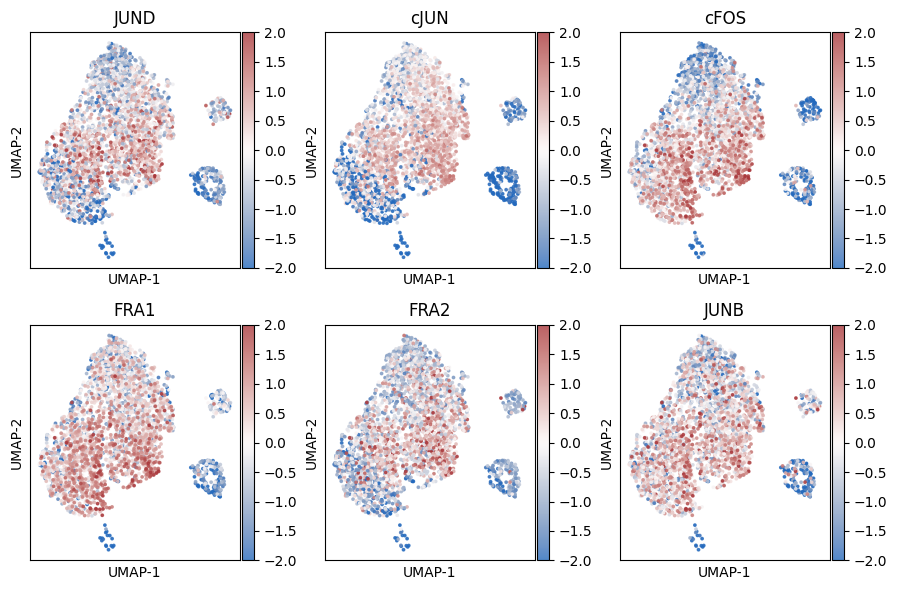

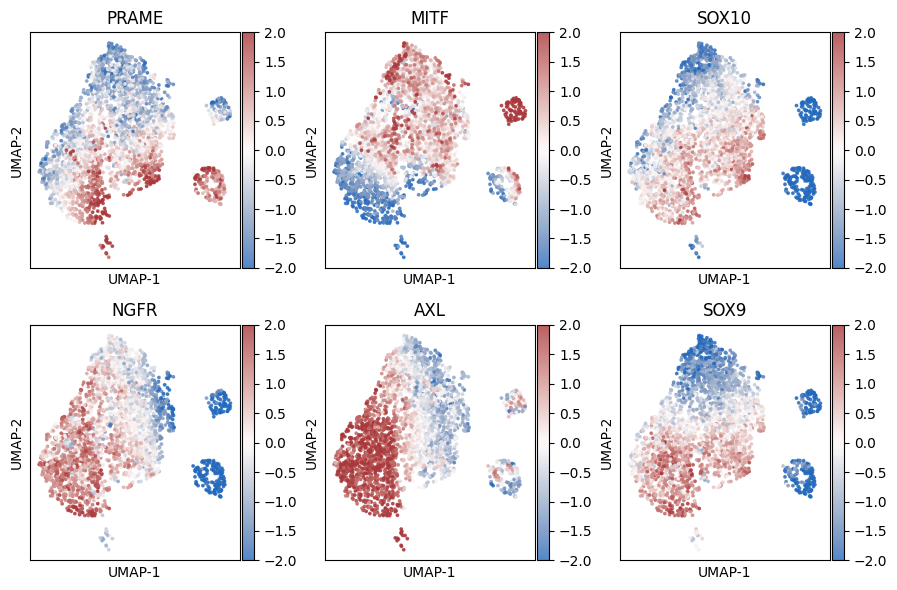

In [574]:
color_palette = {
    "1": "#1f77b4",  # Blue
    "2": "#ff7f0e",  # Orange
    "3": "#2ca02c",  # Green
    "4": "#d62728",  # Red
    "5": "#9467bd",  # Purple
    "6": "#8c564b",  # Brown
    "7": "#e377c2"   # Pink
}
hm.plot_umap_new(Case4_umap_diff, 
                 color=['cJUN','FRA2','cFOS','JUNB','JUND','FRA1'],#'SOX10','SOX9','NGFR','PRAME','AXL','MITF'], 
                 label='umap_diff',
                 layer='tumor_zscore',
                 balance_colors=True,
                 figsize=(3,3),
                 ncols=3,
                 s=3,
                 palette=color_palette,
                 show_layer=None,
                 colorbar_range=(-2, 2),
)


hm.plot_umap_new(Case4_umap_diff, 
                 color=['SOX10','SOX9','NGFR','PRAME','AXL','MITF'], 
                 label='umap_diff',
                 layer='tumor_zscore',
                 balance_colors=True,
                 figsize=(3,3),
                 ncols=3,
                 s=3,
                 palette=color_palette,
                 show_layer=None,
                 colorbar_range=(-2, 2),
                 
)

In [559]:
Case3_umap_diff2 = hm.run_umap(
    Case3_tumor_adata_subset, 
    use_layer='tumor_zscore', 
    n_neighbors=15, 
    n_components=2, 
    metric='euclidean', 
    min_dist=0.2 ,
    random_state=0, 
    label='umap_diff', 
    subset_columns=Diff_state_markers,
    balance_key="cluster_p2"  # Example subset of columns
)

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1990: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:2024: ImplicitModificationWarning:

Setting element `.obsm['umap_diff']` of view, initializing view as actual.



/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:2148: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



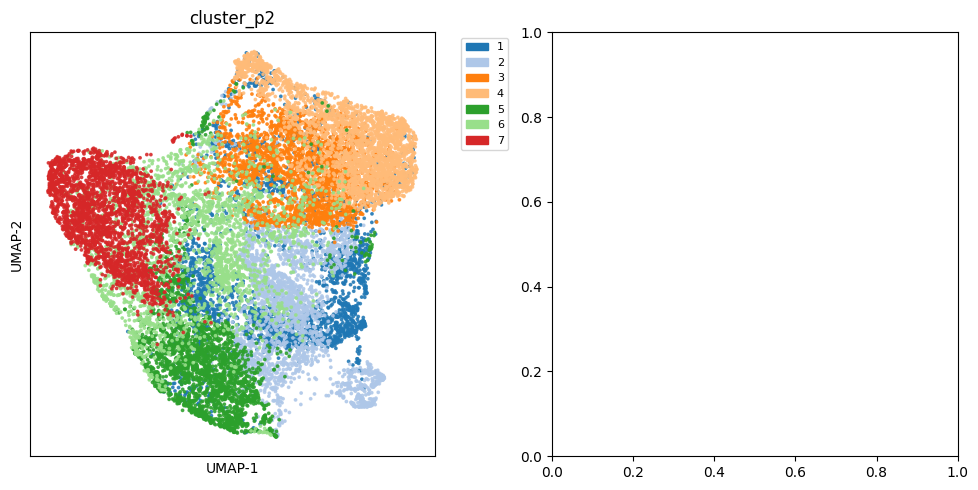

ValueError: Number of rows must be a positive integer, not 0

<Figure size 900x0 with 0 Axes>

In [560]:
color_palette = {
    "1": "#1f77b4",  # Blue
    "2": "#ff7f0e",  # Orange
    "3": "#2ca02c",  # Green
    "4": "#d62728",  # Red
    "5": "#9467bd",  # Purple
    "6": "#8c564b",  # Brown
    "7": "#e377c2"   # Pink
}
hm.plot_umap_new(Case3_umap_diff2, 
                 #color=['cJUN','FRA2','cFOS','JUNB','JUND','FRA1'],#'SOX10','SOX9','NGFR','PRAME','AXL','MITF'], 
                 label='umap_diff',
                 layer='tumor_zscore',
                 balance_colors=True,
                 figsize=(5,5),
                 ncols=3,
                 s=3,
                 palette=color_palette,
                 show_layer='cluster_p2',
                 colorbar_range=(-2, 2),
                 
)

hm.plot_umap_new(Case3_umap_diff2, 
 #                color=['SOX10','SOX9','NGFR','PRAME','AXL','MITF'], 
                 label='umap_diff',
                 layer='tumor_zscore',
                 balance_colors=True,
                 figsize=(3,3),
                 ncols=3,
                 s=3,
                 palette=color_palette,
                 show_layer=None,
                 colorbar_range=(-2, 2),
                 
)

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:2154: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



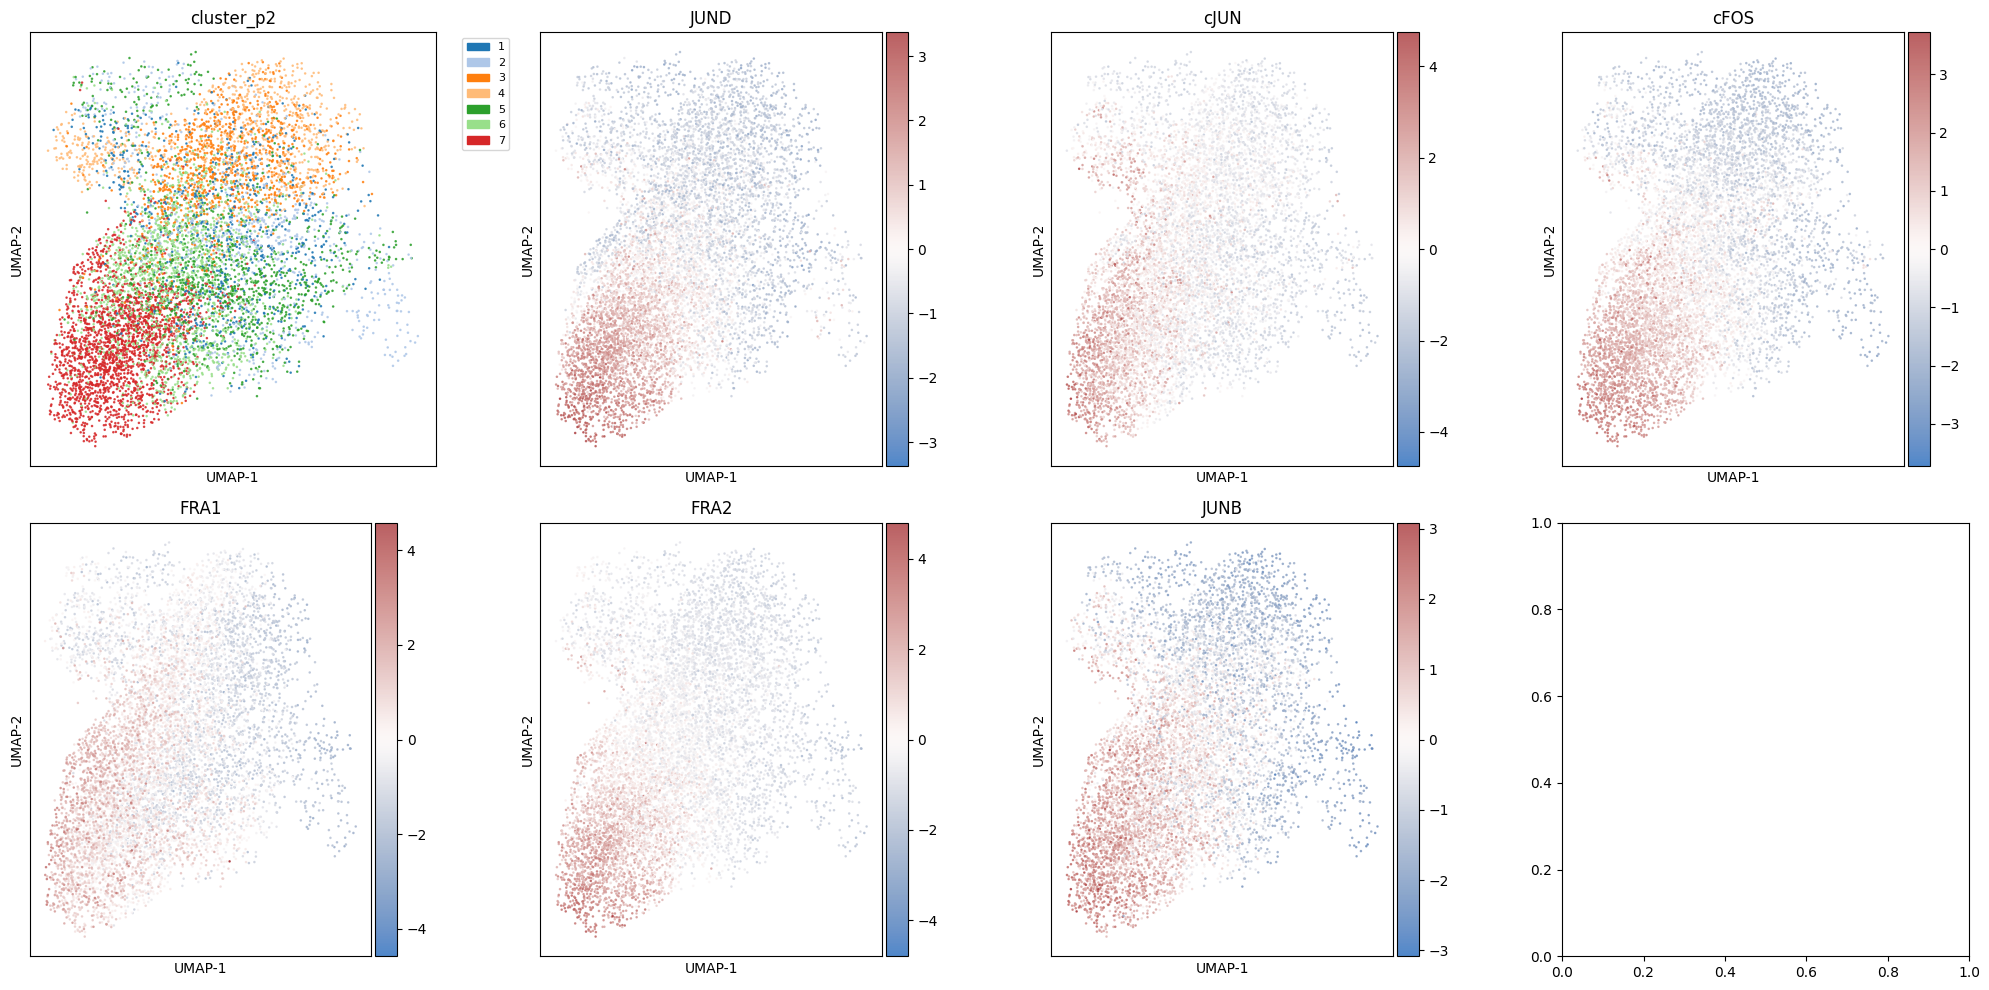

In [427]:
color_palette = {
    "1": "#1f77b4",  # Blue
    "2": "#ff7f0e",  # Orange
    "3": "#2ca02c",  # Green
    "4": "#d62728",  # Red
    "5": "#9467bd",  # Purple
    "6": "#8c564b",  # Brown
    "7": "#e377c2"   # Pink
}
hm.plot_umap_new(Case3_umap_diff, 
                 color=['cJUN','FRA2','cFOS','JUNB','JUND','FRA1'], 
                 label='umap_diff',
                 layer='tumor_zscore',
                 balance_colors=True,
                 figsize=(5,5),
                 ncols=4,
                 palette=color_palette,
                 show_layer='cluster_p2',
                 
)

In [153]:
Case3_tumor_adata_subset.obs['cluster'].value_counts()

cluster
6    82180
7    46070
5    19924
1    17359
2    13200
3     6770
4     2558
Name: count, dtype: int64

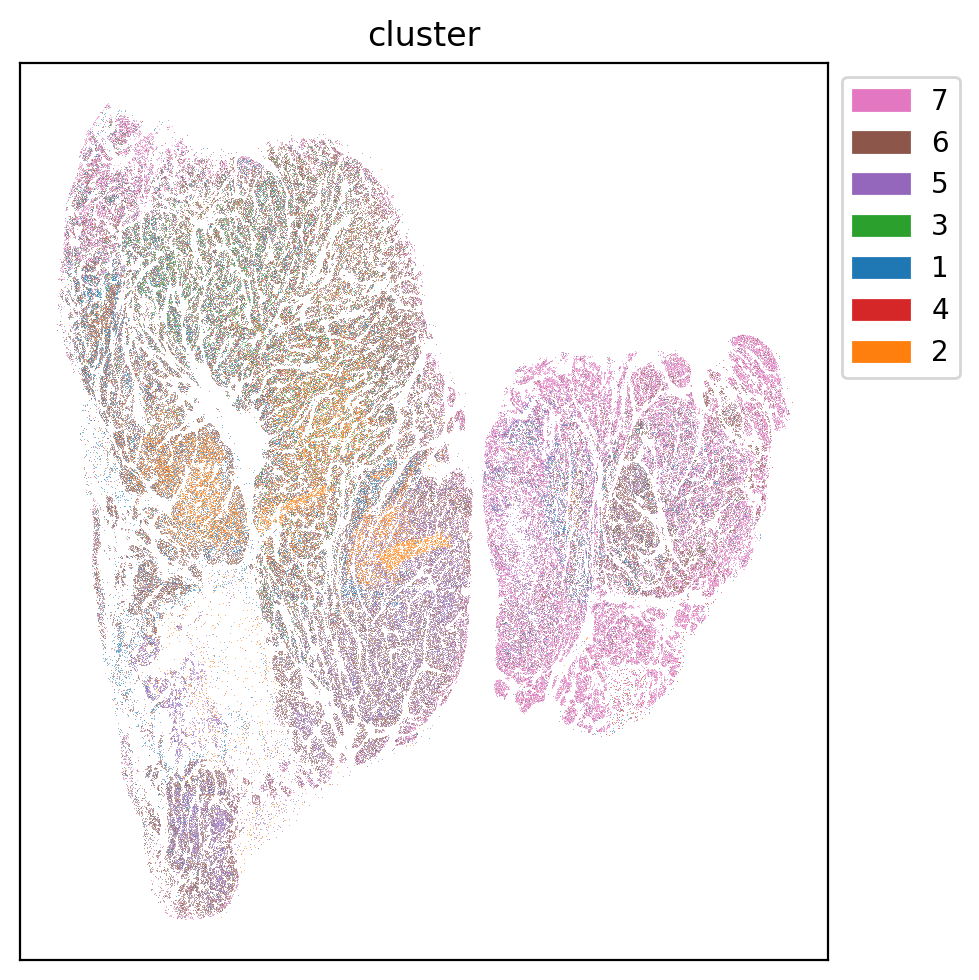

In [ ]:
'''
color_palette = {
    1: "#0000ff",  # Blue
    2: "#ff00ff",   # magenta
    3: "#00ff00",  # lime
    4: "#d62728"   # Red
}
'''
color_palette = {
    1: "#1f77b4",  # Blue
    2: "#ff7f0e",  # Orange
    3: "#2ca02c",  # Green
    4: "#d62728",  # Red
    5: "#9467bd",  # Purple
    6: "#8c564b",  # Brown
    7: "#e377c2"   # Pink
}

sm.pl.spatial_scatterPlot (adata=Case3_tumor_adata_subset,
                 colorBy = ['cluster'],
                 customColors=color_palette,)

In [360]:
hm.spatial_scatterPlot(adata=Case4_tumor_adata_subset,
                 colorBy = ['cluster_p5'],
                 customColors=color_palette,
                 subset_layer='cluster',
                 figsize=(3,2),
                
                 fileName='Case4-2_allclusters.png',
                 saveDir=savedir,
                 )

Saved plot to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/Case4-2_allclusters.png


In [358]:
# Define the color palette
color_palette = {
    1: "#1f77b4",  # Blue
    2: "#ff7f0e",  # Orange
    3: "#2ca02c",  # Green
    4: "#d62728",  # Red
    5: "#9467bd",  # Purple
    6: "#8c564b",  # Brown
    7: "#e377c2"   # Pink
}

# Loop through each cluster (1 to 7)
for cluster_value in range(1, 4):
    # Define the filename for each cluster
    file_name = f"Case4-2_cluster{cluster_value}.png"
    
    # Generate the scatter plot for the current cluster
    hm.spatial_scatterPlot(
        adata=Case4_tumor_adata_subset,
        colorBy=['cluster_p5'],
        customColors=color_palette,
        subset_layer='cluster_p5',
        subset_values=[cluster_value],
        figsize=(3, 2),
        fileName=file_name,  # Save the plot with the defined filename
        saveDir=savedir      # Specify the directory to save the plot
    )

Saved plot to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/Case4-2_cluster1.png
Saved plot to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/Case4-2_cluster2.png
Saved plot to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/Case4-2_cluster3.png


In [ ]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)

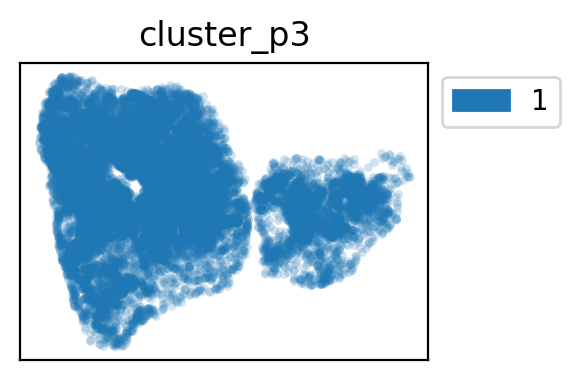

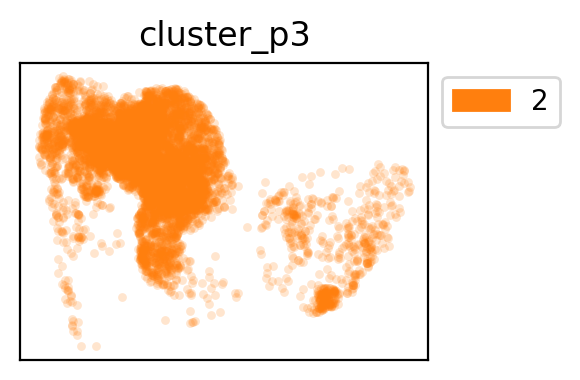

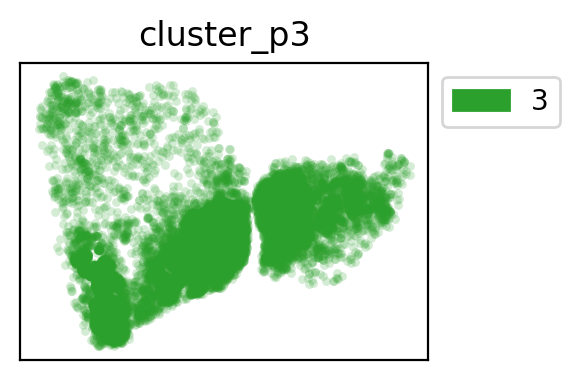

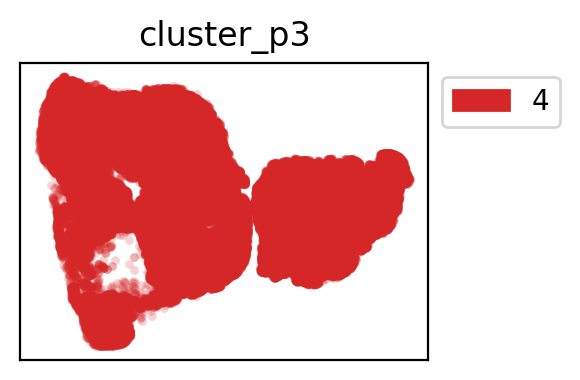

In [253]:
color_palette = {
    1: "#1f77b4",  # Blue
    2: "#ff7f0e",  # Orange
    3: "#2ca02c",  # Green
    4: "#d62728",  # Red
    5: "#9467bd",  # Purple
    6: "#8c564b",  # Brown
    7: "#e377c2"   # Pink
}

# Loop through subset values 1 to 7
for subset_value in range(1, 5):
    # Set the current axis
    hm.spatial_scatterPlot(
        adata=Case3_tumor_adata_subset,
        colorBy=['cluster_p3'],
        customColors=color_palette,
        subset_layer='cluster_p3',
        subset_values=[subset_value],
        alpha=0.2,  # Adjust transparency
        s=10,
        figsize=(3,2)        # Adjust marker size
    )
    ax.set_title(f"Cluster {subset_value}", fontsize=10)



Sampling by subclustering

In [538]:
Case3_tumor_adata_subset

AnnData object with n_obs × n_vars = 188061 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'phenotype', 'phenotype_category', 'ROI', 'cluster_p2', 'cluster_p3'
    uns: 'all_markers', 'gates'
    layers: 'log', 'log1p_raw', 'zscore', 'tumor_zscore'

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1614: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



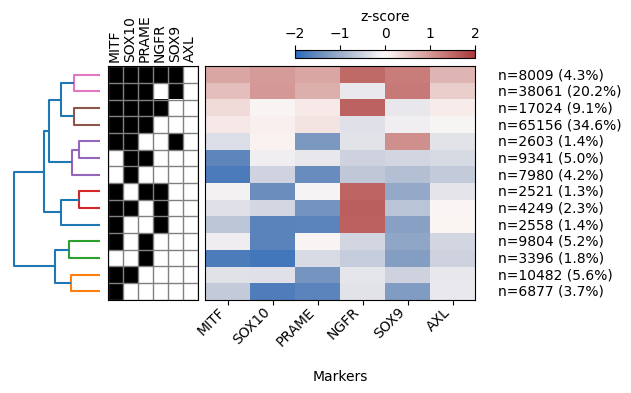

In [539]:
Case3_linkage = hm.heatmapnew(
        Case3_tumor_adata_subset,
        groupBy='phenotype',
        layer='tumor_zscore',
        standardScale=None,
        subsetMarkers=subsetMarkers,
        figsize=(6, 4),
        showPrevalence=True,
        clusterColumns=False,
        clusterRows=True,
        scale_title='z-score',
        dend_threshold=2,
        clustering_method='complete',
        phenotype_matrix=True,
        row_dendrogram=True,
        x_tick_rotation=45,
        dend_axis=False,
        phenotype_labels=['MITF','SOX10','PRAME','NGFR','SOX9','AXL'],
        vmin=-2,
        vmax=2,
        return_row_linkage=True,
    )

In [588]:
tumor_adata_list = [
    (Case1_tumor_adata_subset, "Case1-38"),
    (Case2_tumor_adata_subset, "Case2-7"),
    (Case3_tumor_adata_subset, "Case3-7"),
    (Case4_tumor_adata_subset, "Case4-2")
]
for adata, case_name in tumor_adata_list:
    hm.distPlot(adata, layer='log1p_raw', markers = Diff_state_markers + AP1s, 
                figsize=(6,7),ncols=3, fontsize=12, scale_x1=0, scale_x2=8, 
                saveDir='/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/',
                fileName=f'DistPlot_{case_name}.png')

Saved heatmap to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/DistPlot_Case1-38.png
Saved heatmap to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/DistPlot_Case2-7.png
Saved heatmap to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/DistPlot_Case3-7.png
Saved heatmap to /Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250225_HetMel_Cases1-4_analysis/figures/DistPlot_Case4-2.png
